# <span style="color:#756bb1">Teorema del Limite Centrale</span>

## <span style="color:#e6550d">Teorema del Limite Centrale</span>

![Screenshot 2024-01-04 at 06.52.56.png](<attachment:Screenshot 2024-01-04 at 06.52.56.png>)
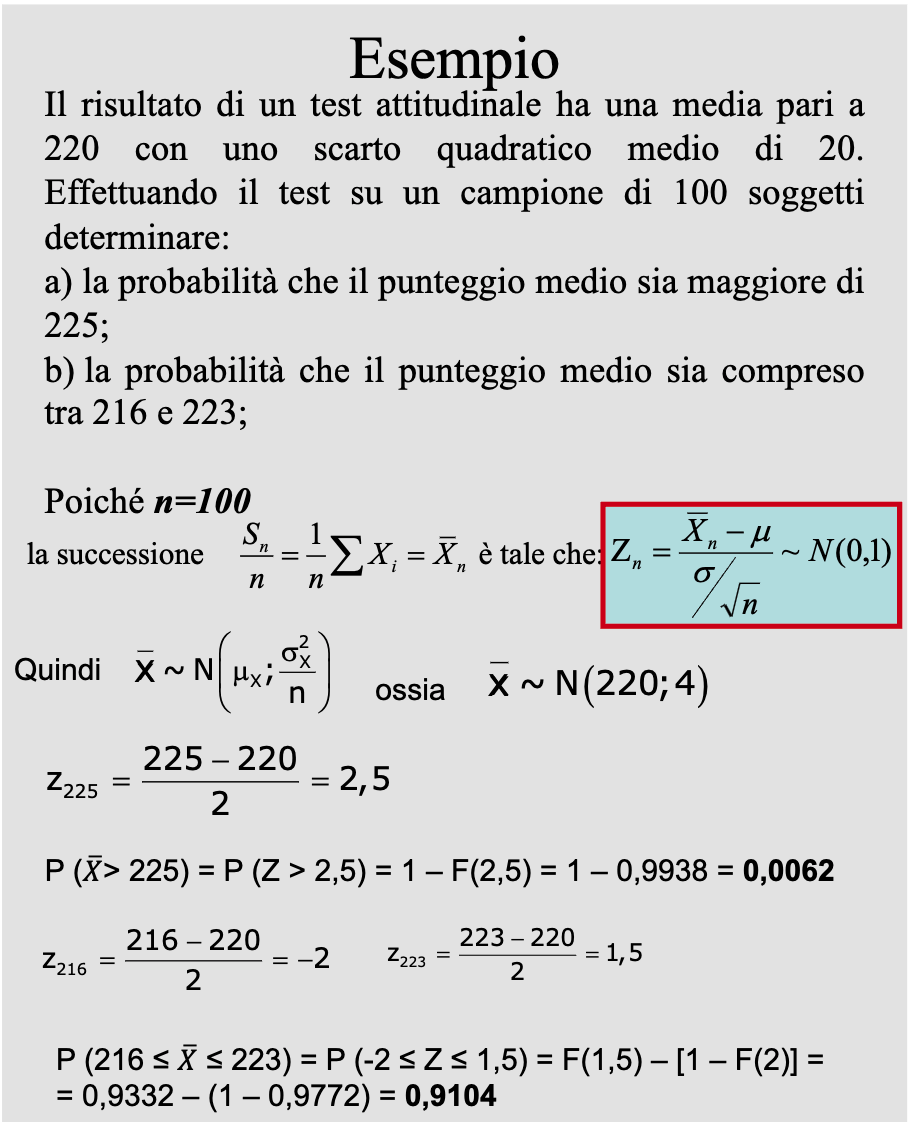

In [12]:
media <- 220
sd <- 20
campione <- 100

# Calcolo della probabilità che il punteggio medio sia maggiore di 225
# 1 - pnorm(2.5)
ris <- 1 - pnorm(225, media, sd/sqrt(campione))
cat("La probabilità che il punteggio medio sia maggiore di 225 è:", ris, "\n")

# Calcolo della probabilità che il punteggio medio sia compreso tra 216 e 223
ris <- pnorm(223, media, sd/sqrt(campione)) - pnorm(216, media, sd/sqrt(campione))
cat("La probabilità che il punteggio medio sia compreso tra 216 e 223 è:", ris)

La probabilit`a che il punteggio medio sia maggiore di 225 `e: 0.006209665 
La probabilit`a che il punteggio medio sia compreso tra 216 e 223 `e: 0.9104427

### <span style="color:#31a354">Esempio di caso Generico</span>

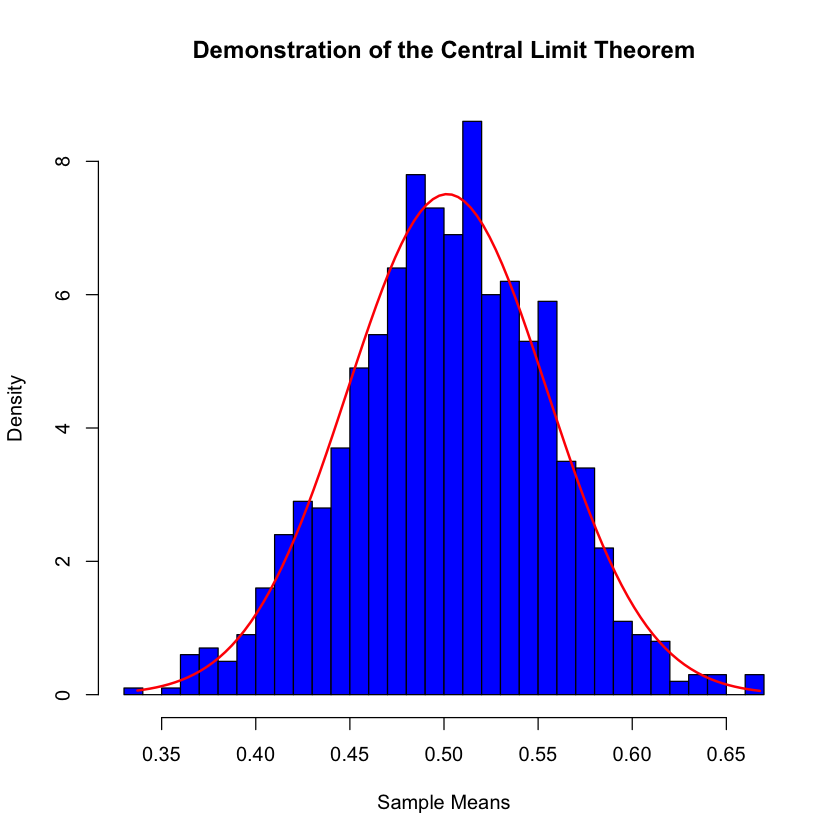

In [15]:
# Set the number of samples and trials
n <- 30
trials <- 1000

# Perform the trials and store the means
sample_means <- replicate(trials, mean(runif(n, min=0, max=1)))

# Plot the histogram of sample means with density instead of frequency
par(bg='white')
hist(sample_means, breaks=40, main="Demonstration of the Central Limit Theorem",
     xlab="Sample Means", ylab="Density", col="blue", freq=FALSE)

# Add a normal distribution curve
x <- seq(min(sample_means), max(sample_means), length=100)
y <- dnorm(x, mean=mean(sample_means), sd=sd(sample_means))
lines(x, y, col="red", lwd=2)


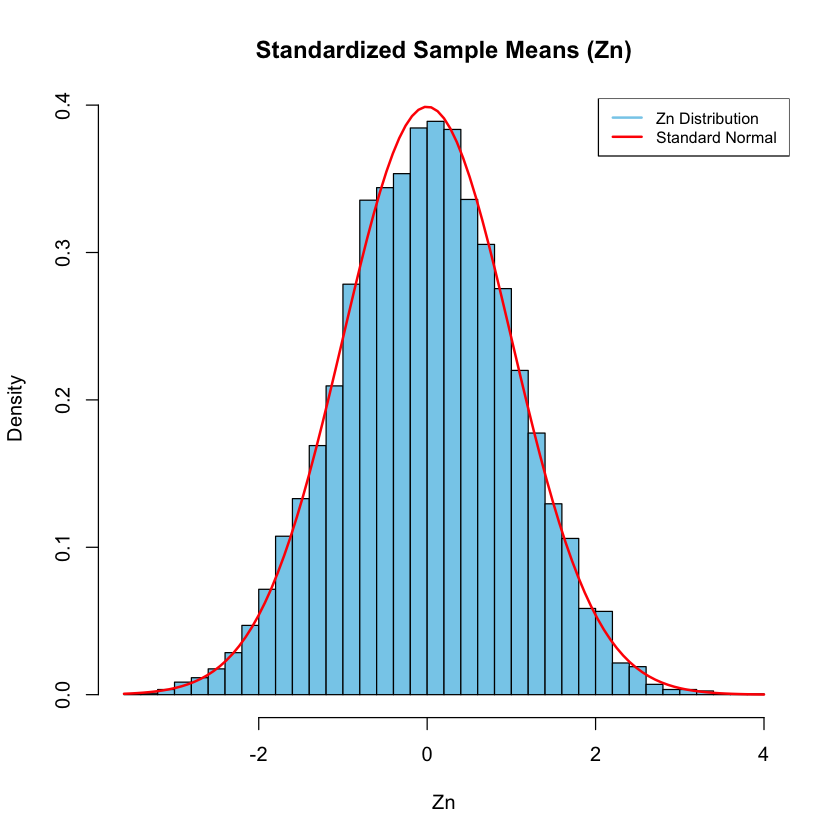

In [26]:
# Set parameters for the uniform distribution and the number of trials
mu <- 0.5
sigma <- sqrt(1/12)
n <- 30
trials <- 10000

# Generate sample means
sample_means <- replicate(trials, mean(runif(n)))

# Standardize the sample means to form Zn
Zn <- (sample_means - mu) / (sigma / sqrt(n))

# Plot the histogram of the standardized sample means
par(bg='white')
hist(Zn, breaks=40, freq=FALSE, main="Standardized Sample Means (Zn)",
     xlab="Zn", ylab="Density", col="skyblue")

# Add a standard normal distribution curve
curve(dnorm(x), add=TRUE, col="red", lwd=2)

# Adding a legend to the plot
legend("topright", legend=c("Zn Distribution", "Standard Normal"), 
       col=c("skyblue", "red"), lwd=2, cex=0.8)


## <span style="color:#e6550d">Teorema di De Moivre-Laplace</span>

### <span style="color:#31a354">Esercizio 1</span>

Dimostrazione del teorema di Laplace.</br>
Verificare che la media di n VC di Bernoulli indipendenti si distribuisce come una VC normale con media p e varianza p(1-p)</br>
- p = 0.05, 0.25, 0.5
- n = 10, 100, 1000

First case vc N(media = 0.05, var = 0.05 * (1 - 0.05))

Caso 1:
- media = 0.05
- varianza = 0.05 * (1 - 0.05) = 0.475

Media teorica:  0.05 
Varianza teorica:  0.0475 
Media di 10 v.c. di Bernoulli indipendenti:  0.053 
Varianza di 10 v.c. di Bernoulli indipendenti:  0.0459 
Media di 100 v.c. di Bernoulli indipendenti:  0.0471 
Varianza di 100 v.c. di Bernoulli indipendenti:  0.044437 


Media di 1000 v.c. di Bernoulli indipendenti:  0.05045 
Varianza di 1000 v.c. di Bernoulli indipendenti:  0.04787481 


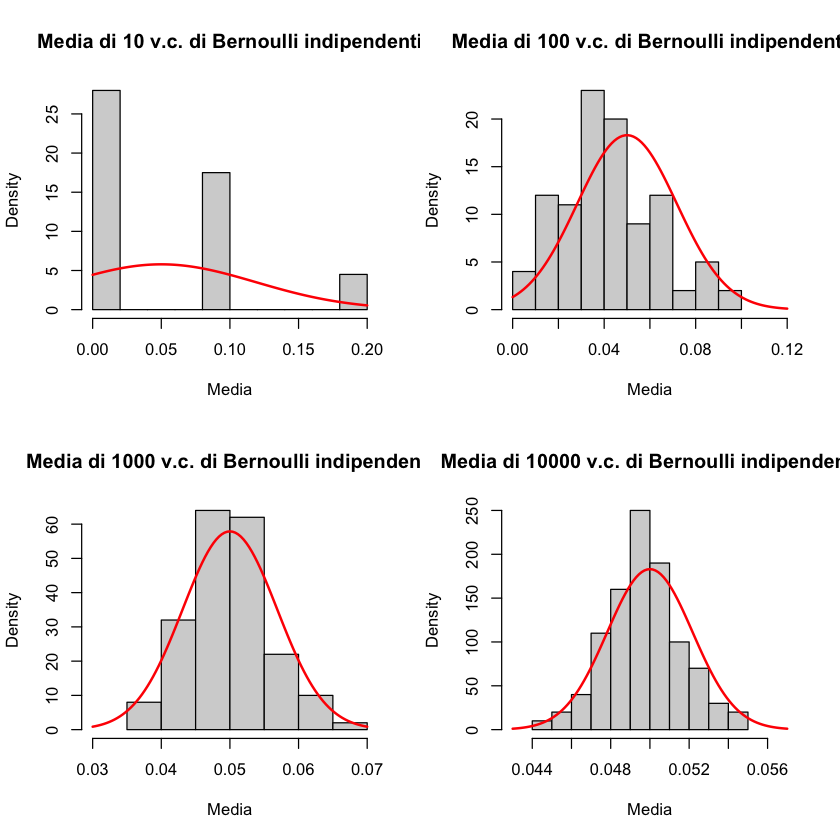

In [13]:
set.seed(123)

media_teorica <- 0.05
varianza_teorica <- media_teorica * (1 - media_teorica)
cat("Media teorica: ", media_teorica, "\n")
cat("Varianza teorica: ", varianza_teorica, "\n")

xmedie10 <- xvarianze10 <- rep(0, 100)
xmedie100 <- xvarianze100 <- rep(0, 100)
xmedie1000 <- xvarianze1000 <- rep(0, 100)
xmedie10000 <- xvarianze10000 <- rep(0, 100)

for (i in 1:100){
  x10 <- rbinom(10, 1, media_teorica)
  m10 <- mean(x10)
  v10 <- m10 * (1 - m10)
  xmedie10[i] <- m10
  xvarianze10[i] <- v10
}
cat("Media di 10 v.c. di Bernoulli indipendenti: ", mean(xmedie10), "\n")
cat("Varianza di 10 v.c. di Bernoulli indipendenti: ", mean(xvarianze10), "\n")

for (i in 1:100){
  x100 <- rbinom(100, 1, media_teorica)
  m100 <- mean(x100)
  v100 <- m100 * (1 - m100)
  xmedie100[i] <- m100
  xvarianze100[i] <- v100
}
cat("Media di 100 v.c. di Bernoulli indipendenti: ", mean(xmedie100), "\n")
cat("Varianza di 100 v.c. di Bernoulli indipendenti: ", mean(xvarianze100), "\n")

for (i in 1:100){
  x1000 <- rbinom(1000, 1, media_teorica)
  m1000 <- mean(x1000)
  v1000 <- m1000 * (1 - m1000)
  xmedie1000[i] <- m1000
  xvarianze1000[i] <- v1000
}
cat("Media di 1000 v.c. di Bernoulli indipendenti: ", mean(xmedie1000), "\n")
cat("Varianza di 1000 v.c. di Bernoulli indipendenti: ", mean(xvarianze1000), "\n")

for (i in 1:100){
  x10000 <- rbinom(10000, 1, media_teorica)
  m10000 <- mean(x10000)
  v10000 <- m10000 * (1 - m10000)
  xmedie10000[i] <- m10000
  xvarianze10000[i] <- v10000
}


# Set up the plotting area
par(bg = "white")
par(mfrow = c(2, 2))

# Plot histograms and overlay the normal density curve for each set of sample means
hist(xmedie10, main = "Media di 10 v.c. di Bernoulli indipendenti", 
  xlab = "Media",
  xlim = c(0, 0.2), 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10)), col = "red", lwd = 2, add = TRUE)

hist(xmedie100, main = "Media di 100 v.c. di Bernoulli indipendenti",
  xlab = "Media", 
  xlim = c(0, 0.12), 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/100)), col = "red", lwd = 2, add = TRUE)

hist(xmedie1000, main = "Media di 1000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  xlim = c(0.03, 0.07), 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/1000)), col = "red", lwd = 2, add = TRUE)

hist(xmedie10000, main = "Media di 10000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  xlim = c(0.043, 0.057), 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10000)), col = "red", lwd = 2, add = TRUE)

Caso 2:
- media = 0.25
- varianza = 0.25 * (1 - 0.25) = 0.1875

Media teorica:  0.25 
Varianza teorica:  0.1875 


Media di 10 v.c. di Bernoulli indipendenti:  0.248 
Varianza di 10 v.c. di Bernoulli indipendenti:  0.1706 
Media di 100 v.c. di Bernoulli indipendenti:  0.2436 
Varianza di 100 v.c. di Bernoulli indipendenti:  0.182454 
Media di 1000 v.c. di Bernoulli indipendenti:  0.2499 
Varianza di 1000 v.c. di Bernoulli indipendenti:  0.1872578 


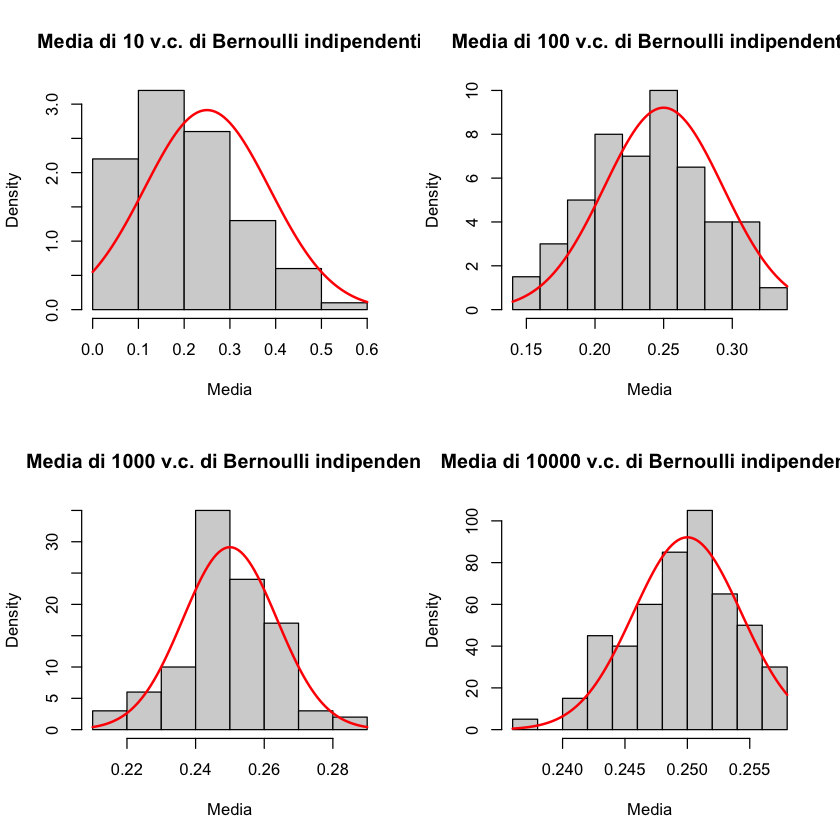

In [14]:
set.seed(123)

media_teorica <- 0.25
varianza_teorica <- media_teorica * (1 - media_teorica)
cat("Media teorica: ", media_teorica, "\n")
cat("Varianza teorica: ", varianza_teorica, "\n")

xmedie10 <- xvarianze10 <- rep(0, 100)
xmedie100 <- xvarianze100 <- rep(0, 100)
xmedie1000 <- xvarianze1000 <- rep(0, 100)
xmedie10000 <- xvarianze10000 <- rep(0, 100)

for (i in 1:100){
  x10 <- rbinom(10, 1, media_teorica)
  m10 <- mean(x10)
  v10 <- m10 * (1 - m10)
  xmedie10[i] <- m10
  xvarianze10[i] <- v10
}
cat("Media di 10 v.c. di Bernoulli indipendenti: ", mean(xmedie10), "\n")
cat("Varianza di 10 v.c. di Bernoulli indipendenti: ", mean(xvarianze10), "\n")

for (i in 1:100){
  x100 <- rbinom(100, 1, media_teorica)
  m100 <- mean(x100)
  v100 <- m100 * (1 - m100)
  xmedie100[i] <- m100
  xvarianze100[i] <- v100
}
cat("Media di 100 v.c. di Bernoulli indipendenti: ", mean(xmedie100), "\n")
cat("Varianza di 100 v.c. di Bernoulli indipendenti: ", mean(xvarianze100), "\n")

for (i in 1:100){
  x1000 <- rbinom(1000, 1, media_teorica)
  m1000 <- mean(x1000)
  v1000 <- m1000 * (1 - m1000)
  xmedie1000[i] <- m1000
  xvarianze1000[i] <- v1000
}
cat("Media di 1000 v.c. di Bernoulli indipendenti: ", mean(xmedie1000), "\n")
cat("Varianza di 1000 v.c. di Bernoulli indipendenti: ", mean(xvarianze1000), "\n")

for (i in 1:100){
  x10000 <- rbinom(10000, 1, media_teorica)
  m10000 <- mean(x10000)
  v10000 <- m10000 * (1 - m10000)
  xmedie10000[i] <- m10000
  xvarianze10000[i] <- v10000
}


# Set up the plotting area
par(bg = "white")
par(mfrow = c(2, 2))

# Plot histograms and overlay the normal density curve for each set of sample means
hist(xmedie10, main = "Media di 10 v.c. di Bernoulli indipendenti", 
  xlab = "Media",
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10)), col = "red", lwd = 2, add = TRUE)

hist(xmedie100, main = "Media di 100 v.c. di Bernoulli indipendenti",
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/100)), col = "red", lwd = 2, add = TRUE)

hist(xmedie1000, main = "Media di 1000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/1000)), col = "red", lwd = 2, add = TRUE)

hist(xmedie10000, main = "Media di 10000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10000)), col = "red", lwd = 2, add = TRUE)

Caso 3:
- media = 0.5
- varianza = 0.5 * (1 - 0.5) = 0.25

Media teorica:  0.5 
Varianza teorica:  0.25 
Media di 10 v.c. di Bernoulli indipendenti:  0.493 
Varianza di 10 v.c. di Bernoulli indipendenti:  0.2233 


Media di 100 v.c. di Bernoulli indipendenti:  0.4946 
Varianza di 100 v.c. di Bernoulli indipendenti:  0.248078 
Media di 1000 v.c. di Bernoulli indipendenti:  0.49782 
Varianza di 1000 v.c. di Bernoulli indipendenti:  0.2497379 


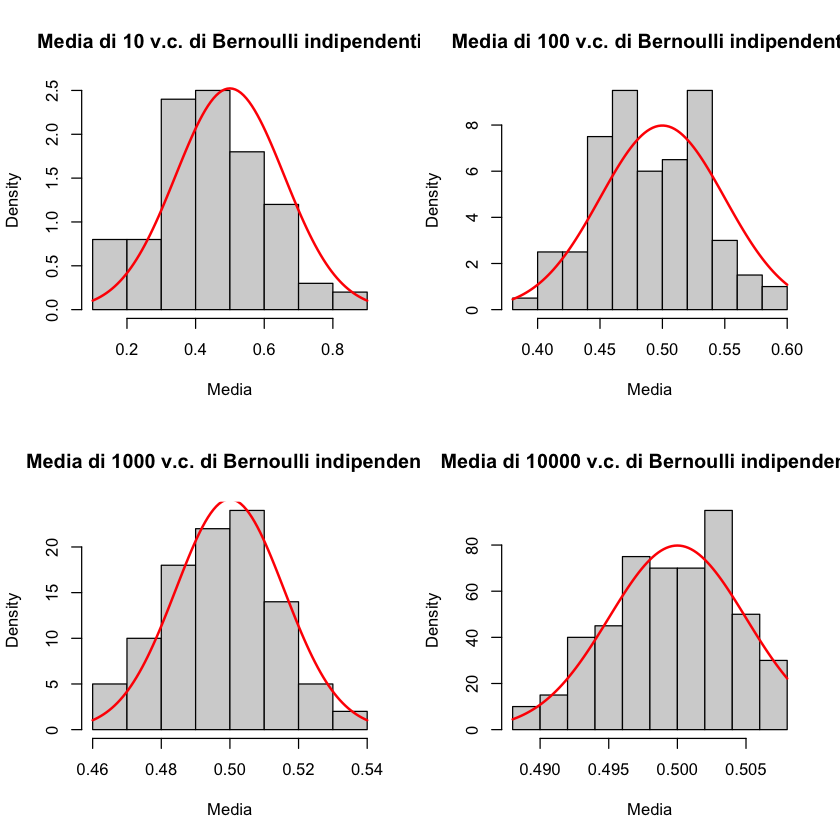

In [15]:
set.seed(123)

media_teorica <- 0.5
varianza_teorica <- media_teorica * (1 - media_teorica)
cat("Media teorica: ", media_teorica, "\n")
cat("Varianza teorica: ", varianza_teorica, "\n")

xmedie10 <- xvarianze10 <- rep(0, 100)
xmedie100 <- xvarianze100 <- rep(0, 100)
xmedie1000 <- xvarianze1000 <- rep(0, 100)
xmedie10000 <- xvarianze10000 <- rep(0, 100)

for (i in 1:100){
  x10 <- rbinom(10, 1, media_teorica)
  m10 <- mean(x10)
  v10 <- m10 * (1 - m10)
  xmedie10[i] <- m10
  xvarianze10[i] <- v10
}
cat("Media di 10 v.c. di Bernoulli indipendenti: ", mean(xmedie10), "\n")
cat("Varianza di 10 v.c. di Bernoulli indipendenti: ", mean(xvarianze10), "\n")

for (i in 1:100){
  x100 <- rbinom(100, 1, media_teorica)
  m100 <- mean(x100)
  v100 <- m100 * (1 - m100)
  xmedie100[i] <- m100
  xvarianze100[i] <- v100
}
cat("Media di 100 v.c. di Bernoulli indipendenti: ", mean(xmedie100), "\n")
cat("Varianza di 100 v.c. di Bernoulli indipendenti: ", mean(xvarianze100), "\n")

for (i in 1:100){
  x1000 <- rbinom(1000, 1, media_teorica)
  m1000 <- mean(x1000)
  v1000 <- m1000 * (1 - m1000)
  xmedie1000[i] <- m1000
  xvarianze1000[i] <- v1000
}
cat("Media di 1000 v.c. di Bernoulli indipendenti: ", mean(xmedie1000), "\n")
cat("Varianza di 1000 v.c. di Bernoulli indipendenti: ", mean(xvarianze1000), "\n")

for (i in 1:100){
  x10000 <- rbinom(10000, 1, media_teorica)
  m10000 <- mean(x10000)
  v10000 <- m10000 * (1 - m10000)
  xmedie10000[i] <- m10000
  xvarianze10000[i] <- v10000
}


# Set up the plotting area
par(bg = "white")
par(mfrow = c(2, 2))

# Plot histograms and overlay the normal density curve for each set of sample means
hist(xmedie10, main = "Media di 10 v.c. di Bernoulli indipendenti", 
  xlab = "Media",
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10)), col = "red", lwd = 2, add = TRUE)

hist(xmedie100, main = "Media di 100 v.c. di Bernoulli indipendenti",
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/100)), col = "red", lwd = 2, add = TRUE)

hist(xmedie1000, main = "Media di 1000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/1000)), col = "red", lwd = 2, add = TRUE)

hist(xmedie10000, main = "Media di 10000 v.c. di Bernoulli indipendenti", 
  xlab = "Media", 
  freq = FALSE)
curve(dnorm(x, mean = media_teorica, sd = sqrt(varianza_teorica/10000)), col = "red", lwd = 2, add = TRUE)

## <span style="color:#e6550d">Esercizio 2</span>

![Screenshot 2024-01-04 at 07.07.13.png](<attachment:Screenshot 2024-01-04 at 07.07.13.png>) ![Screenshot 2024-01-04 at 07.07.22.png](<attachment:Screenshot 2024-01-04 at 07.07.22.png>)
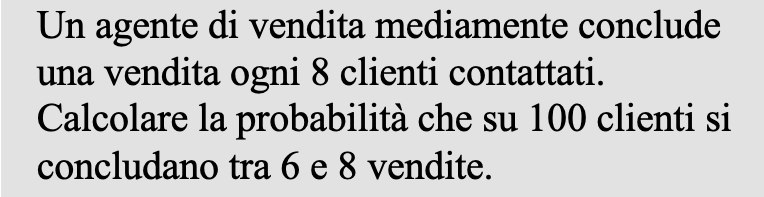
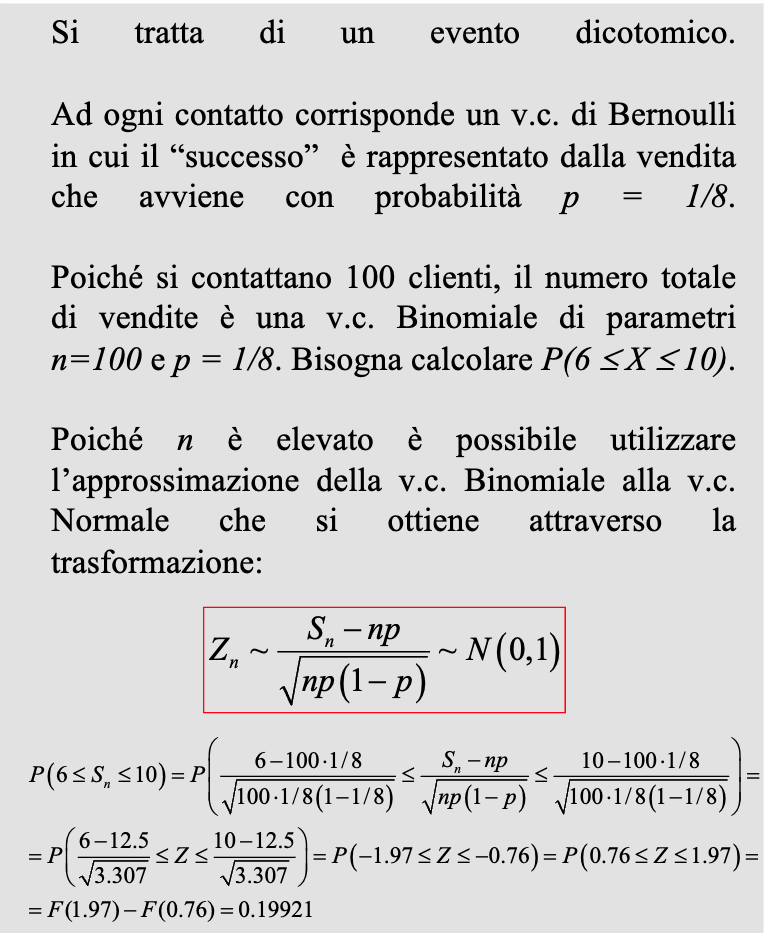

In [19]:
n = 100
p = 1/8

# Calcolare le probabilità che X sia ≥ di 6 e ≤ di 10
ris <- pbinom(10, n, p) - pbinom(6, n, p)
cat("La probabilità che (6 <= X <= 10) è:", ris, "\n")

# Calcolare la probabilità utilizzando la funzione pnorm
ris <- pnorm(10, n*p, sqrt(n*p*(1-p))) - pnorm(6, n*p, sqrt(n*p*(1-p)))
cat("La probabilità che (6 <= X <= 10) è:", ris, "\n")


La probabilit`a che (6 <= X <= 10) `e: 0.2542716 
La probabilit`a che (6 <= X <= 10) `e: 0.2001628 
